# Feature engineering
This notebook will focus on the following:

- Spliting train/test dataset:
- Creating our target feature (Customer Lifetime value)
- Engineering RMF (recency, monitory, frequency based features)
- Experimenting with some automated feature creatations - (identify important polynomial or interactions)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_clean = pd.read_csv('/Users/ryanmurray/Desktop/Project_Folder/CLV_Project/CLV-MLOPs-Project/data/processed/cleaned_online_retail.csv')

In [ ]:

# ============================================
# DATASET 1: TRAINING SET
# ============================================
print("\n1. TRAINING SET")
print("-"*60)

TRAIN_FEATURE_START = '2010-12-01'
TRAIN_FEATURE_END = '2011-08-31'
TRAIN_TARGET_START = '2011-09-01'
TRAIN_TARGET_END = '2011-11-30'

print(f"Feature period: {TRAIN_FEATURE_START} to {TRAIN_FEATURE_END}")
print(f"Target period:  {TRAIN_TARGET_START} to {TRAIN_TARGET_END}")

# Split data
train_feature_df = df_clean[
    (df_clean['InvoiceDate'] >= TRAIN_FEATURE_START) & 
    (df_clean['InvoiceDate'] <= TRAIN_FEATURE_END)
].copy()

train_target_df = df_clean[
    (df_clean['InvoiceDate'] >= TRAIN_TARGET_START) & 
    (df_clean['InvoiceDate'] <= TRAIN_TARGET_END)
].copy()

# Get active customers
train_customers = train_feature_df['CustomerID'].unique()

# Calculate CLV
train_clv = train_target_df.groupby('CustomerID')['Revenue'].sum().reset_index()
train_clv.columns = ['CustomerID', 'CLV_Target']

# Create dataset
train_data = pd.DataFrame({'CustomerID': train_customers})
train_data = train_data.merge(train_clv, on='CustomerID', how='left')
train_data['CLV_Target'] = train_data['CLV_Target'].fillna(0)

print(f"Active customers: {len(train_data)}")
print(f"Active rate: {(train_data['CLV_Target'] > 0).mean()*100:.1f}%")

# Save
train_feature_df.to_csv('../data/processed/train_feature_transactions.csv', index=False)
train_data.to_csv('../data/processed/train_clv_target.csv', index=False)

# ============================================
# DATASET 2: VALIDATION SET
# ============================================
print("\n2. VALIDATION SET")
print("-"*60)

VAL_FEATURE_START = '2010-12-01'
VAL_FEATURE_END = '2011-05-31'
VAL_TARGET_START = '2011-06-01'
VAL_TARGET_END = '2011-08-31'

print(f"Feature period: {VAL_FEATURE_START} to {VAL_FEATURE_END}")
print(f"Target period:  {VAL_TARGET_START} to {VAL_TARGET_END}")

# Split data
val_feature_df = df_clean[
    (df_clean['InvoiceDate'] >= VAL_FEATURE_START) & 
    (df_clean['InvoiceDate'] <= VAL_FEATURE_END)
].copy()

val_target_df = df_clean[
    (df_clean['InvoiceDate'] >= VAL_TARGET_START) & 
    (df_clean['InvoiceDate'] <= VAL_TARGET_END)
].copy()

# Get active customers
val_customers = val_feature_df['CustomerID'].unique()

# Calculate CLV
val_clv = val_target_df.groupby('CustomerID')['Revenue'].sum().reset_index()
val_clv.columns = ['CustomerID', 'CLV_Target']

# Create dataset
val_data = pd.DataFrame({'CustomerID': val_customers})
val_data = val_data.merge(val_clv, on='CustomerID', how='left')
val_data['CLV_Target'] = val_data['CLV_Target'].fillna(0)

print(f"Active customers: {len(val_data)}")
print(f"Active rate: {(val_data['CLV_Target'] > 0).mean()*100:.1f}%")

# Save
val_feature_df.to_csv('../data/processed/val_feature_transactions.csv', index=False)
val_data.to_csv('../data/processed/val_clv_target.csv', index=False)

# ============================================
# DATASET 3: TEST SET
# ============================================
print("\n3. TEST SET")
print("-"*60)

TEST_FEATURE_START = '2010-12-01'
TEST_FEATURE_END = '2011-09-30'
TEST_TARGET_START = '2011-10-01'
TEST_TARGET_END = '2011-12-31'

print(f"Feature period: {TEST_FEATURE_START} to {TEST_FEATURE_END}")
print(f"Target period:  {TEST_TARGET_START} to {TEST_TARGET_END}")

# Split data
test_feature_df = df_clean[
    (df_clean['InvoiceDate'] >= TEST_FEATURE_START) & 
    (df_clean['InvoiceDate'] <= TEST_FEATURE_END)
].copy()

test_target_df = df_clean[
    (df_clean['InvoiceDate'] >= TEST_TARGET_START) & 
    (df_clean['InvoiceDate'] <= TEST_TARGET_END)
].copy()

# Get active customers
test_customers = test_feature_df['CustomerID'].unique()

# Calculate CLV
test_clv = test_target_df.groupby('CustomerID')['Revenue'].sum().reset_index()
test_clv.columns = ['CustomerID', 'CLV_Target']

# Create dataset
test_data = pd.DataFrame({'CustomerID': test_customers})
test_data = test_data.merge(test_clv, on='CustomerID', how='left')
test_data['CLV_Target'] = test_data['CLV_Target'].fillna(0)

print(f"Active customers: {len(test_data)}")
print(f"Active rate: {(test_data['CLV_Target'] > 0).mean()*100:.1f}%")

# Save
test_feature_df.to_csv('../data/processed/test_feature_transactions.csv', index=False)
test_data.to_csv('../data/processed/test_clv_target.csv', index=False)

# ============================================
# SUMMARY
# ============================================
print("\n" + "="*60)
print("SUMMARY")
print("="*60)
print(f"Training set:   {len(train_data):,} customers")
print(f"Validation set: {len(val_data):,} customers")
print(f"Test set:       {len(test_data):,} customers")

print("\n" + "="*60)
print("SAVED FILES")
print("="*60)
print("Training:")
print("  - data/processed/train_feature_transactions.csv")
print("  - data/processed/train_clv_target.csv")
print("\nValidation:")
print("  - data/processed/val_feature_transactions.csv")
print("  - data/processed/val_clv_target.csv")
print("\nTest:")
print("  - data/processed/test_feature_transactions.csv")
print("  - data/processed/test_clv_target.csv")

print("\n" + "="*60)
print("NEXT STEPS")
print("="*60)
print("1. Create features using train_feature_transactions.csv")
print("2. Apply SAME feature engineering to val and test")
print("3. Train models on training set")
print("4. Tune on validation set")
print("5. Final evaluation on test set")



## Your File Structure

# After running this, you'll have:
# ```
# data/processed/
# ├── cleaned_data.csv                      # All transactions
# │
# ├── train_feature_transactions.csv        # Dec 2010 - Aug 2011
# ├── train_clv_target.csv                  # CustomerID + CLV (Sep-Nov 2011)
# │
# ├── val_feature_transactions.csv          # Dec 2010 - May 2011
# ├── val_clv_target.csv                    # CustomerID + CLV (Jun-Aug 2011)
# │
# ├── test_feature_transactions.csv         # Dec 2010 - Sep 2011
# └── test_clv_target.csv                   # CustomerID + CLV (Oct-Dec 2011)


1. TRAINING SET
------------------------------------------------------------
Feature period: 2010-12-01 to 2011-08-31
Target period:  2011-09-01 to 2011-11-30
Active customers: 3292
Active rate: 56.1%

2. VALIDATION SET
------------------------------------------------------------
Feature period: 2010-12-01 to 2011-05-31
Target period:  2011-06-01 to 2011-08-31
Active customers: 2689
Active rate: 49.5%

3. TEST SET
------------------------------------------------------------
Feature period: 2010-12-01 to 2011-09-30
Target period:  2011-10-01 to 2011-12-31
Active customers: 3583
Active rate: 51.0%

SUMMARY
Training set:   3,292 customers
Validation set: 2,689 customers
Test set:       3,583 customers

SAVED FILES
Training:
  - data/processed/train_feature_transactions.csv
  - data/processed/train_clv_target.csv

Validation:
  - data/processed/val_feature_transactions.csv
  - data/processed/val_clv_target.csv

Test:
  - data/processed/test_feature_transactions.csv
  - data/processed/test

RFM FEATURE ENGINEERING

1. TRAINING SET
------------------------------------------------------------
Creating features for 3,292 customers
Observation date: 2011-08-31 00:00:00
✓ Created 9 features for 3,292 customers

Final training dataset shape: (3292, 11)
Features: 9
Missing CLV targets: 0
✓ Saved: data/features/train_features_with_target.csv

2. VALIDATION SET
------------------------------------------------------------
Creating features for 2,689 customers
Observation date: 2011-05-31 00:00:00
✓ Created 9 features for 2,689 customers

Final validation dataset shape: (2689, 11)
Features: 9
Missing CLV targets: 0
✓ Saved: data/features/val_features_with_target.csv

3. TEST SET
------------------------------------------------------------
Creating features for 3,583 customers
Observation date: 2011-09-30 00:00:00
✓ Created 9 features for 3,583 customers

Final test dataset shape: (3583, 11)
Features: 9
Missing CLV targets: 0
✓ Saved: data/features/test_features_with_target.csv

FEAT

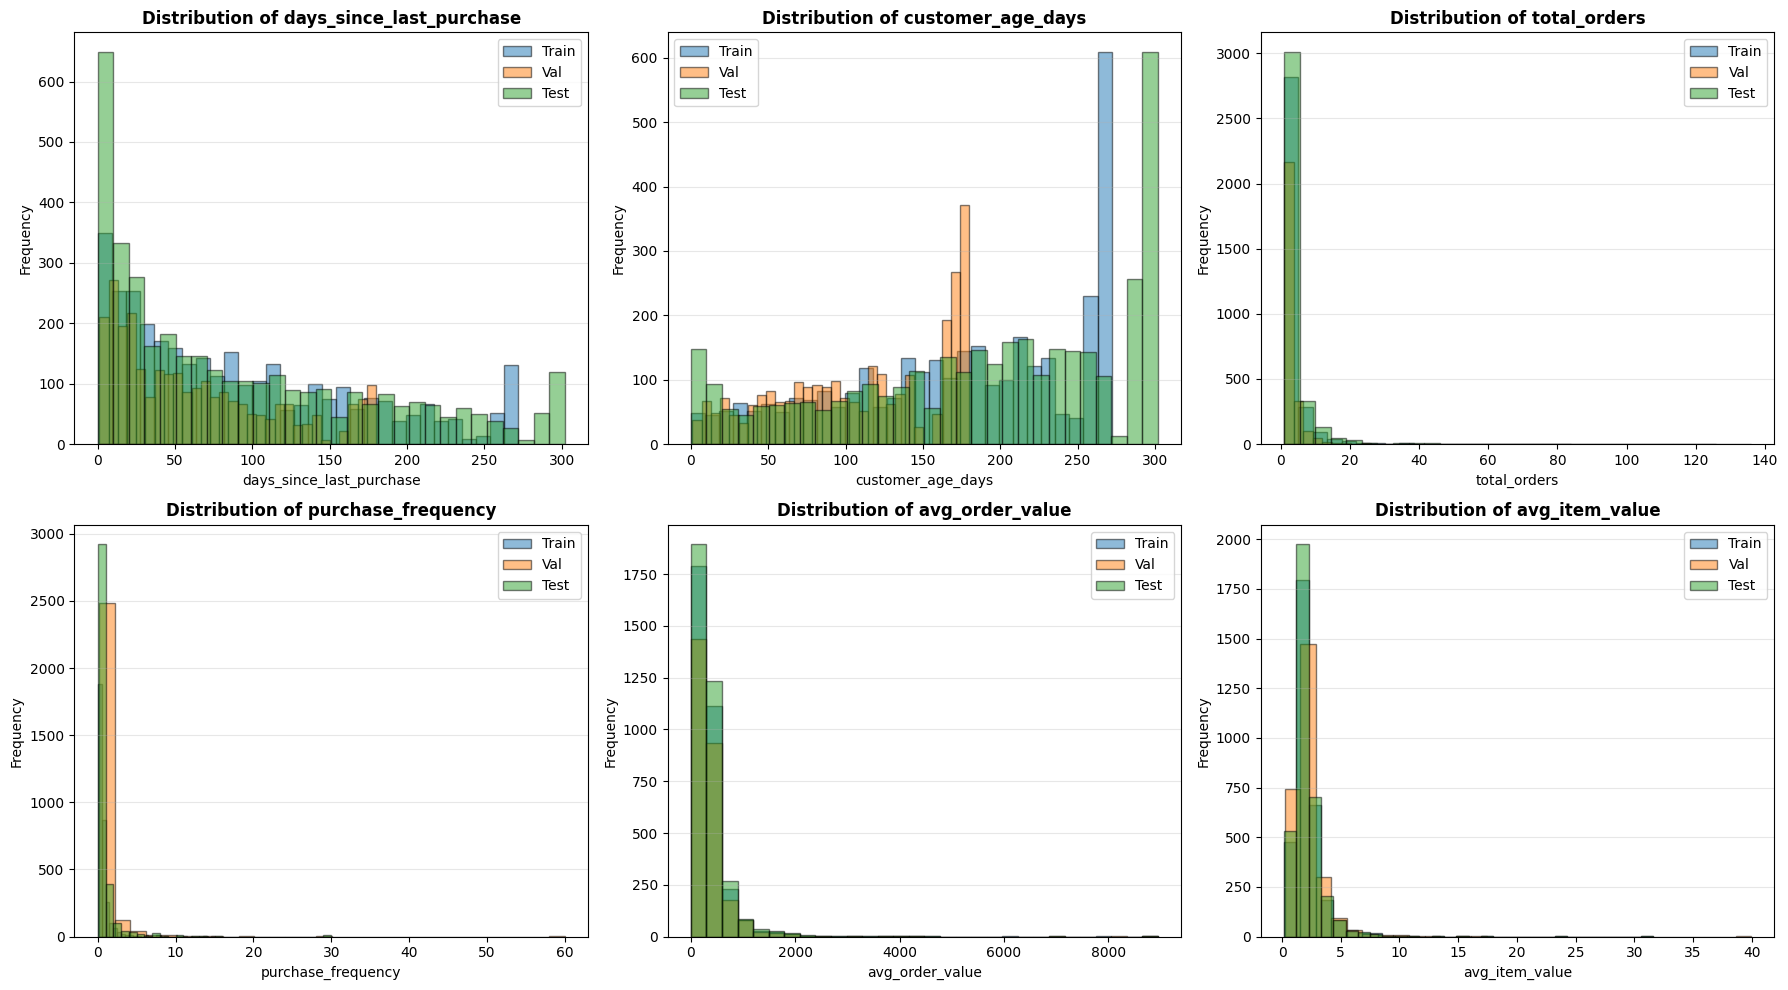

✓ Saved feature distribution plot

FEATURE CORRELATION WITH CLV TARGET

Correlation with CLV_Target (Training Set):
CLV_Target                 1.000000
total_orders               0.472142
avg_order_value            0.382409
avg_items_per_order        0.302018
purchase_frequency         0.264641
active_days                0.209211
customer_age_days          0.110863
avg_item_value            -0.004533
avg_days_between_orders   -0.023021
Name: CLV_Target, dtype: float64


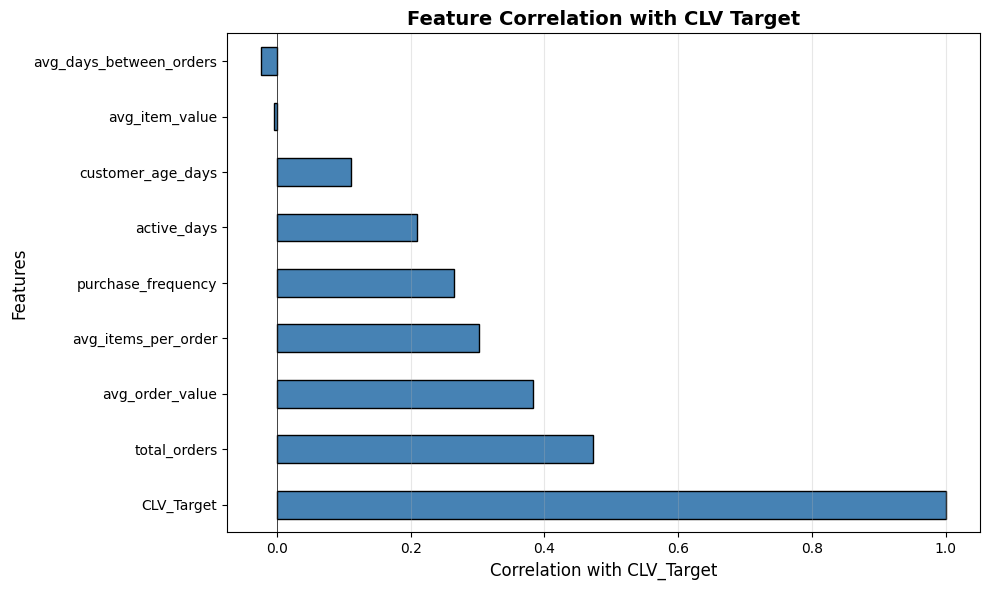

✓ Saved correlation plot

FEATURE ENGINEERING COMPLETE

Datasets created:
  Training:   3,292 customers × 11 columns
  Validation: 2,689 customers × 11 columns
  Test:       3,583 customers × 11 columns

Features created: 9
  - Recency features: 3
  - Frequency features: 4
  - Monetary features: 2

Files saved:
  - data/features/train_features_with_target.csv
  - data/features/val_features_with_target.csv
  - data/features/test_features_with_target.csv
  - data/features/feature_distributions.png
  - data/features/feature_correlations.png

NEXT STEPS
1. Review feature distributions and correlations
2. Check for any anomalies or unexpected values
3. Proceed to baseline modeling
4. Consider adding more advanced features if needed


In [18]:
# ============================================
# RFM FEATURE ENGINEERING
# Create features for Train, Validation, and Test sets
# ============================================

import pandas as pd
import numpy as np

def create_rfm_features(transactions_df, observation_date):
    """
    Create RFM features for each customer based on their transaction history.
    
    Parameters:
    -----------
    transactions_df : DataFrame
        Transaction data from feature period (one row per transaction)
        Must have: CustomerID, InvoiceNo, InvoiceDate, Quantity, Revenue
    
    observation_date : str or datetime
        End date of feature period (e.g., '2011-08-31')
        Used as reference point for calculating recency
    
    Returns:
    --------
    DataFrame with CustomerID and features (one row per customer)
    """
    
    # Convert observation date to datetime
    observation_date = pd.to_datetime(observation_date)
    
    # Ensure InvoiceDate is datetime
    transactions_df['InvoiceDate'] = pd.to_datetime(transactions_df['InvoiceDate'])
    
    print(f"Creating features for {transactions_df['CustomerID'].nunique():,} customers")
    print(f"Observation date: {observation_date}")
    
    # Initialize list to store features
    features_list = []
    
    # Get unique customers
    customers = transactions_df['CustomerID'].unique()
    
    # Loop through each customer
    for customer_id in customers:
        # Get all transactions for this customer
        customer_df = transactions_df[transactions_df['CustomerID'] == customer_id].copy()
        
        # Sort by date
        customer_df = customer_df.sort_values('InvoiceDate')
        
        # Get invoice-level data (group by invoice for order-level metrics)
        invoices = customer_df.groupby('InvoiceNo').agg({
            'InvoiceDate': 'first',  # Invoice date
            'Quantity': 'sum',        # Total items in order
            'Revenue': 'sum'          # Total order value
        }).reset_index()
        
        # ============================================
        # RECENCY FEATURES
        # ============================================
        
        # Last and first purchase dates
        last_purchase_date = customer_df['InvoiceDate'].max()
        first_purchase_date = customer_df['InvoiceDate'].min()
        
        # 1. Days since last purchase
        days_since_last_purchase = (observation_date - last_purchase_date).days
        
        # 2. Customer age (tenure)
        customer_age_days = (observation_date - first_purchase_date).days
        
        # 3. Active days (time between first and last purchase)
        active_days = (last_purchase_date - first_purchase_date).days
        
        # ============================================
        # FREQUENCY FEATURES
        # ============================================
        
        # 4. Total number of orders
        total_orders = invoices['InvoiceNo'].nunique()
        
        # 5. Purchase frequency (orders per month)
        # Avoid division by zero - customer needs at least 1 day of history
        if customer_age_days > 0:
            months_active = customer_age_days / 30.0
            purchase_frequency = total_orders / months_active
        else:
            purchase_frequency = 0
        
        # 6. Average items per order
        avg_items_per_order = customer_df['Quantity'].sum() / total_orders
        
        # 7. Average orders (this seems like it might be avg days between orders?)
        # Interpreting as average days between purchases
        if total_orders > 1:
            avg_days_between_orders = active_days / (total_orders - 1)
        else:
            avg_days_between_orders = 0  # Only one order, can't calculate
        
        # ============================================
        # MONETARY FEATURES
        # ============================================
        
        # Total revenue
        total_revenue = customer_df['Revenue'].sum()
        
        # 8. Average order value
        avg_order_value = total_revenue / total_orders
        
        # 9. Average item value
        total_items = customer_df['Quantity'].sum()
        if total_items > 0:
            avg_item_value = total_revenue / total_items
        else:
            avg_item_value = 0
        
        # ============================================
        # Create feature dictionary
        # ============================================
        
        feature_dict = {
            'CustomerID': customer_id,
            
            # Recency features
            'days_since_last_purchase': days_since_last_purchase,
            'customer_age_days': customer_age_days,
            'active_days': active_days,
            
            # Frequency features
            'total_orders': total_orders,
            'purchase_frequency': purchase_frequency,
            'avg_items_per_order': avg_items_per_order,
            'avg_days_between_orders': avg_days_between_orders,
            
            # Monetary features
            'avg_order_value': avg_order_value,
            'avg_item_value': avg_item_value
        }
        
        features_list.append(feature_dict)
    
    # Convert to DataFrame
    features_df = pd.DataFrame(features_list)
    
    print(f"✓ Created {len(features_df.columns)-1} features for {len(features_df):,} customers")
    
    return features_df


# ============================================
# CREATE FEATURES FOR ALL THREE DATASETS
# ============================================

print("="*60)
print("RFM FEATURE ENGINEERING")
print("="*60)

# ============================================
# 1. TRAINING SET FEATURES
# ============================================

print("\n1. TRAINING SET")
print("-"*60)

# Load training data
train_transactions = pd.read_csv('../data/processed/train_feature_transactions.csv')
train_targets = pd.read_csv('../data/processed/train_clv_target.csv')

# Create features (observation date = end of feature period)
train_features = create_rfm_features(
    transactions_df=train_transactions,
    observation_date='2011-08-31'
)

# Merge with targets
train_final = train_features.merge(train_targets, on='CustomerID', how='left')

# Verify merge
print(f"\nFinal training dataset shape: {train_final.shape}")
print(f"Features: {train_final.shape[1] - 2}")  # Subtract CustomerID and CLV_Target
print(f"Missing CLV targets: {train_final['CLV_Target'].isnull().sum()}")

# Save
train_final.to_csv('../data/features/train_features_with_target.csv', index=False)
print("✓ Saved: data/features/train_features_with_target.csv")

# ============================================
# 2. VALIDATION SET FEATURES
# ============================================

print("\n2. VALIDATION SET")
print("-"*60)

# Load validation data
val_transactions = pd.read_csv('../data/processed/val_feature_transactions.csv')
val_targets = pd.read_csv('../data/processed/val_clv_target.csv')

# Create features (observation date = end of feature period)
val_features = create_rfm_features(
    transactions_df=val_transactions,
    observation_date='2011-05-31'
)

# Merge with targets
val_final = val_features.merge(val_targets, on='CustomerID', how='left')

# Verify merge
print(f"\nFinal validation dataset shape: {val_final.shape}")
print(f"Features: {val_final.shape[1] - 2}")
print(f"Missing CLV targets: {val_final['CLV_Target'].isnull().sum()}")

# Save
val_final.to_csv('../data/features/val_features_with_target.csv', index=False)
print("✓ Saved: data/features/val_features_with_target.csv")

# ============================================
# 3. TEST SET FEATURES
# ============================================

print("\n3. TEST SET")
print("-"*60)

# Load test data
test_transactions = pd.read_csv('../data/processed/test_feature_transactions.csv')
test_targets = pd.read_csv('../data/processed/test_clv_target.csv')

# Create features (observation date = end of feature period)
test_features = create_rfm_features(
    transactions_df=test_transactions,
    observation_date='2011-09-30'
)

# Merge with targets
test_final = test_features.merge(test_targets, on='CustomerID', how='left')

# Verify merge
print(f"\nFinal test dataset shape: {test_final.shape}")
print(f"Features: {test_final.shape[1] - 2}")
print(f"Missing CLV targets: {test_final['CLV_Target'].isnull().sum()}")

# Save
test_final.to_csv('../data/features/test_features_with_target.csv', index=False)
print("✓ Saved: data/features/test_features_with_target.csv")

# ============================================
# SUMMARY STATISTICS
# ============================================

print("\n" + "="*60)
print("FEATURE SUMMARY STATISTICS")
print("="*60)

def print_feature_stats(df, dataset_name):
    """Print summary statistics for features"""
    print(f"\n{dataset_name}:")
    print("-"*60)
    
    # Exclude CustomerID and CLV_Target
    feature_cols = [col for col in df.columns if col not in ['CustomerID', 'CLV_Target']]
    
    print(df[feature_cols].describe().T[['mean', 'std', 'min', '50%', 'max']])

print_feature_stats(train_final, "TRAINING SET")
print_feature_stats(val_final, "VALIDATION SET")
print_feature_stats(test_final, "TEST SET")

# ============================================
# CHECK FOR MISSING VALUES
# ============================================

print("\n" + "="*60)
print("MISSING VALUE CHECK")
print("="*60)

print(f"\nTraining set missing values:")
print(train_final.isnull().sum())

print(f"\nValidation set missing values:")
print(val_final.isnull().sum())

print(f"\nTest set missing values:")
print(test_final.isnull().sum())

# ============================================
# FEATURE DISTRIBUTIONS COMPARISON
# ============================================

import matplotlib.pyplot as plt

print("\n" + "="*60)
print("CREATING FEATURE DISTRIBUTION PLOTS")
print("="*60)

# Select features to plot
features_to_plot = [
    'days_since_last_purchase',
    'customer_age_days', 
    'total_orders',
    'purchase_frequency',
    'avg_order_value',
    'avg_item_value'
]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, feature in enumerate(features_to_plot):
    ax = axes[idx]
    
    # Plot all three datasets
    ax.hist(train_final[feature], bins=30, alpha=0.5, label='Train', edgecolor='black')
    ax.hist(val_final[feature], bins=30, alpha=0.5, label='Val', edgecolor='black')
    ax.hist(test_final[feature], bins=30, alpha=0.5, label='Test', edgecolor='black')
    
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../data/features/feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved feature distribution plot")

# ============================================
# CORRELATION WITH TARGET
# ============================================

print("\n" + "="*60)
print("FEATURE CORRELATION WITH CLV TARGET")
print("="*60)

# Calculate correlations for training set
feature_cols = [col for col in train_final.columns if col not in ['CustomerID', 'CLV_Target']]
correlations = train_final[feature_cols + ['CLV_Target']].corr()['CLV_Target'].sort_values(ascending=False)

print("\nCorrelation with CLV_Target (Training Set):")
print(correlations[:-1])  # Exclude CLV_Target's correlation with itself

# Visualize correlations
plt.figure(figsize=(10, 6))
correlations[:-1].plot(kind='barh', color='steelblue', edgecolor='black')
plt.xlabel('Correlation with CLV_Target', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Correlation with CLV Target', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('../data/features/feature_correlations.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved correlation plot")

# ============================================
# FINAL SUMMARY
# ============================================

print("\n" + "="*60)
print("FEATURE ENGINEERING COMPLETE")
print("="*60)

print(f"\nDatasets created:")
print(f"  Training:   {train_final.shape[0]:,} customers × {train_final.shape[1]} columns")
print(f"  Validation: {val_final.shape[0]:,} customers × {val_final.shape[1]} columns")
print(f"  Test:       {test_final.shape[0]:,} customers × {test_final.shape[1]} columns")

print(f"\nFeatures created: {len(feature_cols)}")
print(f"  - Recency features: 3")
print(f"  - Frequency features: 4")
print(f"  - Monetary features: 2")

print(f"\nFiles saved:")
print(f"  - data/features/train_features_with_target.csv")
print(f"  - data/features/val_features_with_target.csv")
print(f"  - data/features/test_features_with_target.csv")
print(f"  - data/features/feature_distributions.png")
print(f"  - data/features/feature_correlations.png")

print(f"\n{'='*60}")
print("NEXT STEPS")
print(f"{'='*60}")
print("1. Review feature distributions and correlations")
print("2. Check for any anomalies or unexpected values")
print("3. Proceed to baseline modeling")
print("4. Consider adding more advanced features if needed")



FEATURE QUALITY CHECKS

Dataset shape: (3292, 11)
Customers: 3,292
Features: 9

CHECK 1: MISSING VALUES

Missing values by column:
Empty DataFrame
Columns: [Missing_Count, Missing_Percent]
Index: []
✓ No missing values found!

CHECK 2: NEGATIVE VALUES

Checking for negative values in features that should be positive:
✓ customer_age_days: No negative values
✓ active_days: No negative values
✓ total_orders: No negative values
✓ purchase_frequency: No negative values
✓ avg_items_per_order: No negative values
✓ avg_order_value: No negative values

CHECK 3: ZERO VALUES

Checking for zero values:
⚠️  customer_age_days: 4 zero values (0.12%)
✓ total_orders: No zeros
✓ avg_order_value: No zeros

CHECK 4: INFINITY VALUES
✓ No infinity values found!

CHECK 5: EXTREME OUTLIERS

Checking for values beyond 99.9th percentile:

active_days:
  99.9th percentile: 271.00
  Max value: 272.00
  Values above 99.9%: 1

total_orders:
  99.9th percentile: 68.71
  Max value: 126.00
  Values above 99.9%: 4

pur

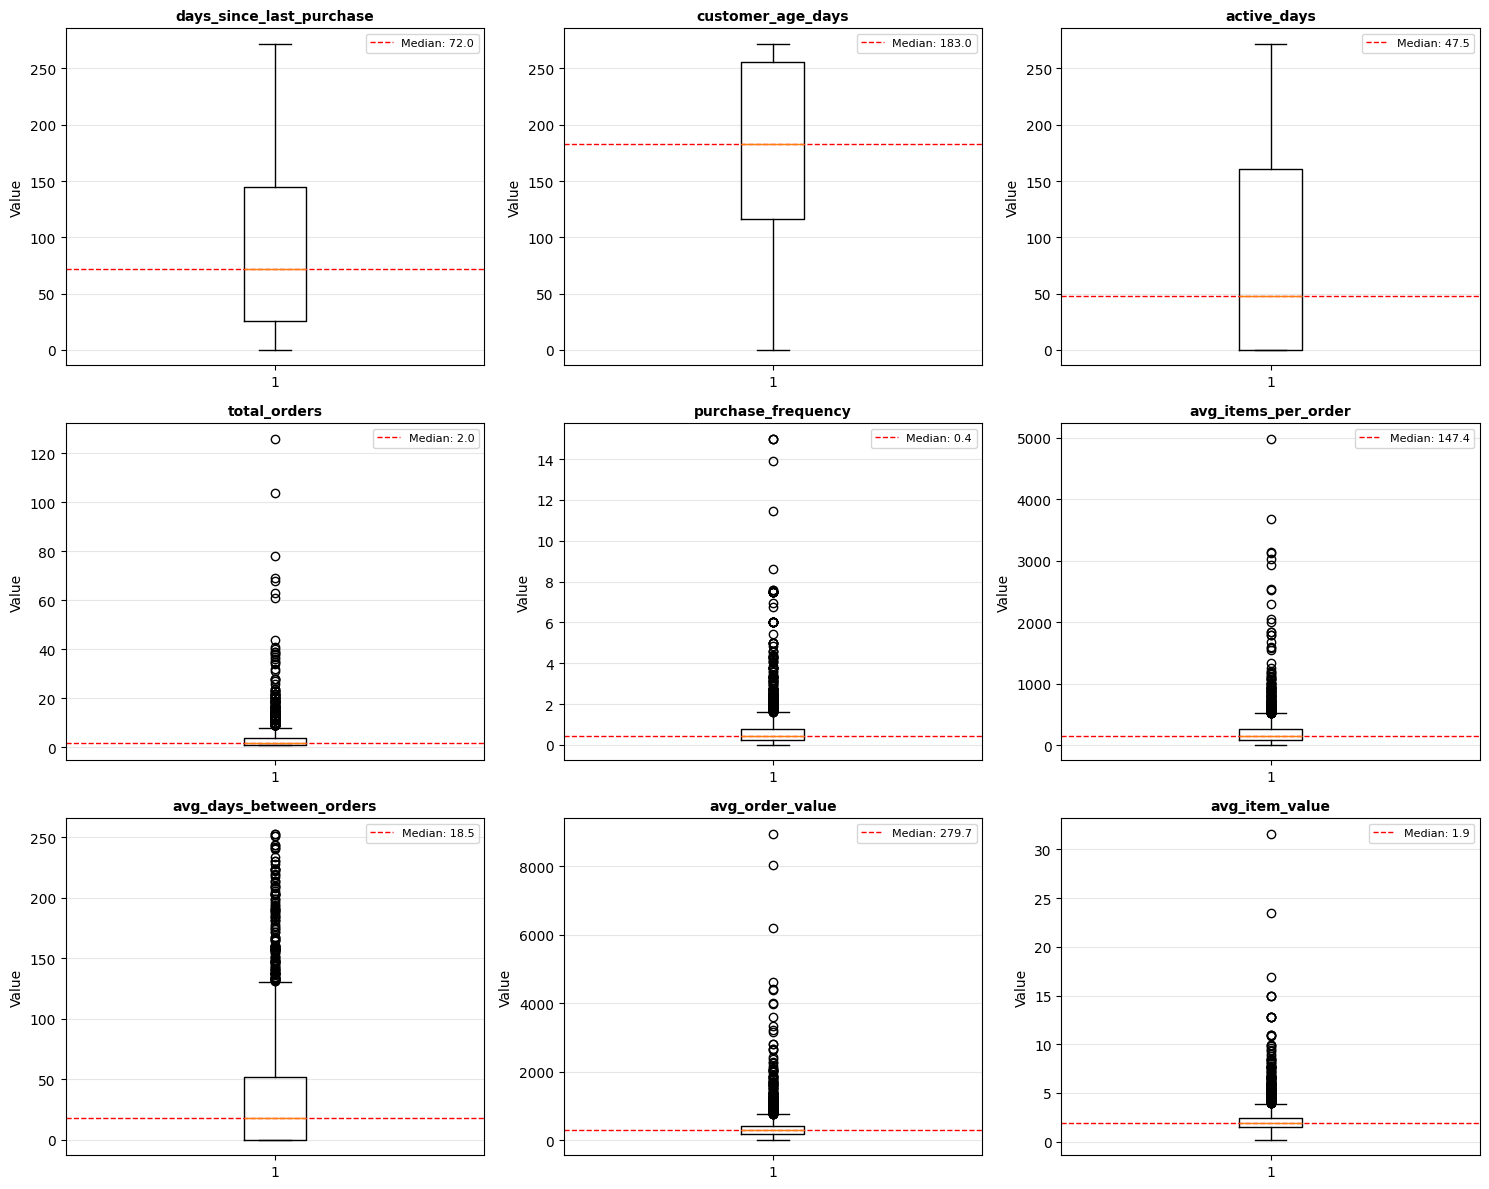

✓ Saved boxplot visualization

QUALITY CHECK SUMMARY

✓ NO CRITICAL ISSUES FOUND!
✓ Features look good - ready for modeling

NEXT STEPS
1. Review any warnings above
2. Check the boxplot visualization for outliers
3. If everything looks good, repeat for validation and test sets
4. Proceed to baseline modeling


In [19]:
# ============================================
# FEATURE QUALITY CHECKS
# ============================================


print("="*60)
print("FEATURE QUALITY CHECKS")
print("="*60)

# Load training data (check this first, then apply same to val/test)
train_data = pd.read_csv('../data/features/train_features_with_target.csv')

print(f"\nDataset shape: {train_data.shape}")
print(f"Customers: {len(train_data):,}")
print(f"Features: {train_data.shape[1] - 2}")  # Exclude CustomerID and CLV_Target

# ============================================
# CHECK 1: MISSING VALUES
# ============================================

print("\n" + "="*60)
print("CHECK 1: MISSING VALUES")
print("="*60)

missing = train_data.isnull().sum()
missing_pct = (missing / len(train_data)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Missing_Percent': missing_pct
})

print("\nMissing values by column:")
print(missing_df[missing_df['Missing_Count'] > 0])

if missing_df['Missing_Count'].sum() == 0:
    print("✓ No missing values found!")
else:
    print(f"⚠️  Found missing values in {(missing_df['Missing_Count'] > 0).sum()} columns")

# ============================================
# CHECK 2: NEGATIVE VALUES (where they shouldn't be)
# ============================================

print("\n" + "="*60)
print("CHECK 2: NEGATIVE VALUES")
print("="*60)

# These features should NEVER be negative
non_negative_features = [
    'customer_age_days',
    'active_days',
    'total_orders',
    'purchase_frequency',
    'avg_items_per_order',
    'avg_order_value'
]

print("\nChecking for negative values in features that should be positive:")
for feature in non_negative_features:
    if feature in train_data.columns:
        negative_count = (train_data[feature] < 0).sum()
        if negative_count > 0:
            print(f"⚠️  {feature}: {negative_count} negative values")
            print(f"   Min value: {train_data[feature].min():.2f}")
        else:
            print(f"✓ {feature}: No negative values")

# ============================================
# CHECK 3: ZERO VALUES (potential issues)
# ============================================

print("\n" + "="*60)
print("CHECK 3: ZERO VALUES")
print("="*60)

# Check for zeros in features where zero might be problematic
features_to_check = [
    'customer_age_days',      # Should never be 0
    'total_orders',           # Should never be 0 (every customer has ≥1 order)
    'avg_order_value',        # Should never be 0
]

print("\nChecking for zero values:")
for feature in features_to_check:
    if feature in train_data.columns:
        zero_count = (train_data[feature] == 0).sum()
        if zero_count > 0:
            print(f"⚠️  {feature}: {zero_count} zero values ({zero_count/len(train_data)*100:.2f}%)")
        else:
            print(f"✓ {feature}: No zeros")

# ============================================
# CHECK 4: INFINITY VALUES
# ============================================

print("\n" + "="*60)
print("CHECK 4: INFINITY VALUES")
print("="*60)

feature_cols = [col for col in train_data.columns if col not in ['CustomerID', 'CLV_Target']]

inf_count = 0
for feature in feature_cols:
    if np.isinf(train_data[feature]).any():
        count = np.isinf(train_data[feature]).sum()
        print(f"⚠️  {feature}: {count} infinity values")
        inf_count += count

if inf_count == 0:
    print("✓ No infinity values found!")

# ============================================
# CHECK 5: EXTREME OUTLIERS (beyond reasonable bounds)
# ============================================

print("\n" + "="*60)
print("CHECK 5: EXTREME OUTLIERS")
print("="*60)

print("\nChecking for values beyond 99.9th percentile:")
for feature in feature_cols:
    p999 = train_data[feature].quantile(0.999)
    extreme_count = (train_data[feature] > p999).sum()
    
    if extreme_count > 0:
        print(f"\n{feature}:")
        print(f"  99.9th percentile: {p999:.2f}")
        print(f"  Max value: {train_data[feature].max():.2f}")
        print(f"  Values above 99.9%: {extreme_count}")

# ============================================
# CHECK 6: FEATURE RANGES
# ============================================

print("\n" + "="*60)
print("CHECK 6: FEATURE RANGES (Min/Max)")
print("="*60)

print("\nFeature value ranges:")
for feature in feature_cols:
    print(f"\n{feature}:")
    print(f"  Min:    {train_data[feature].min():.2f}")
    print(f"  Median: {train_data[feature].median():.2f}")
    print(f"  Mean:   {train_data[feature].mean():.2f}")
    print(f"  Max:    {train_data[feature].max():.2f}")

# ============================================
# CHECK 7: LOGICAL CONSISTENCY
# ============================================

print("\n" + "="*60)
print("CHECK 7: LOGICAL CONSISTENCY CHECKS")
print("="*60)

# Check 1: active_days should be <= customer_age_days
if 'active_days' in train_data.columns and 'customer_age_days' in train_data.columns:
    invalid = (train_data['active_days'] > train_data['customer_age_days']).sum()
    if invalid > 0:
        print(f"⚠️  {invalid} customers have active_days > customer_age_days (impossible!)")
    else:
        print("✓ active_days ≤ customer_age_days for all customers")

# Check 2: days_since_last_purchase should be <= customer_age_days
if 'days_since_last_purchase' in train_data.columns and 'customer_age_days' in train_data.columns:
    invalid = (train_data['days_since_last_purchase'] > train_data['customer_age_days']).sum()
    if invalid > 0:
        print(f"⚠️  {invalid} customers have days_since_last_purchase > customer_age_days (impossible!)")
    else:
        print("✓ days_since_last_purchase ≤ customer_age_days for all customers")

# Check 3: total_orders should be >= 1
if 'total_orders' in train_data.columns:
    invalid = (train_data['total_orders'] < 1).sum()
    if invalid > 0:
        print(f"⚠️  {invalid} customers have total_orders < 1 (impossible!)")
    else:
        print("✓ All customers have at least 1 order")

# ============================================
# CHECK 8: QUICK VISUALIZATION
# ============================================

print("\n" + "="*60)
print("CHECK 8: CREATING BOXPLOTS")
print("="*60)

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, feature in enumerate(feature_cols):
    if idx < 9:  # Only plot first 9 features
        ax = axes[idx]
        
        # Boxplot
        ax.boxplot(train_data[feature], vert=True)
        ax.set_title(feature, fontsize=10, fontweight='bold')
        ax.set_ylabel('Value')
        ax.grid(axis='y', alpha=0.3)
        
        # Add median line
        median_val = train_data[feature].median()
        ax.axhline(y=median_val, color='red', linestyle='--', 
                   linewidth=1, label=f'Median: {median_val:.1f}')
        ax.legend(fontsize=8)

plt.tight_layout()
plt.savefig('../data/features/feature_quality_check.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved boxplot visualization")

# ============================================
# SUMMARY
# ============================================

print("\n" + "="*60)
print("QUALITY CHECK SUMMARY")
print("="*60)

issues_found = []

# Count issues
if missing_df['Missing_Count'].sum() > 0:
    issues_found.append("Missing values detected")

if inf_count > 0:
    issues_found.append("Infinity values detected")

# Check for negative values in non-negative features
for feature in non_negative_features:
    if feature in train_data.columns:
        if (train_data[feature] < 0).sum() > 0:
            issues_found.append(f"Negative values in {feature}")

if len(issues_found) > 0:
    print("\n⚠️  ISSUES FOUND:")
    for issue in issues_found:
        print(f"  - {issue}")
    print("\n→ Review and fix these issues before modeling!")
else:
    print("\n✓ NO CRITICAL ISSUES FOUND!")
    print("✓ Features look good - ready for modeling")

print("\n" + "="*60)
print("NEXT STEPS")
print("="*60)
print("1. Review any warnings above")
print("2. Check the boxplot visualization for outliers")
print("3. If everything looks good, repeat for validation and test sets")
print("4. Proceed to baseline modeling")

In [20]:

train_data = pd.read_csv('../data/features/train_features_with_target.csv')
val_data = pd.read_csv('../data/features/val_features_with_target.csv')
test_data = pd.read_csv('../data/features/test_features_with_target.csv')

print(train_data["CustomerID"].duplicated().sum())
print(val_data["CustomerID"].duplicated().sum())
print(test_data["CustomerID"].duplicated().sum())

0
0
0


# Automated Feature Enginerrnig with Featuretools

1. Create automated features with feature tools
2. Remove low information and highly correlated feature
3. Feature selection (inpute and scale features before feature selection)

In [21]:
import featuretools as ft

/opt/anaconda3/envs/clv_project/lib/python3.10/site-packages/woodwork/__init__.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [38]:
df_train = pd.read_csv('/Users/ryanmurray/Desktop/Project_Folder/CLV_Project/CLV-MLOPs-Project/data/processed/train_feature_transactions.csv')
df_train.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'IsCancelled', 'Revenue',
       'IsReturn'],
      dtype='object')

In [39]:
df_train = df_train[df_train['IsCancelled'] == 0]
df_train = df_train.drop(columns=['IsCancelled', 'Description', 'InvoiceNo'])
df_train['InvoiceDate'] = pd.to_datetime(df_train['InvoiceDate'])

In [40]:
df_train.dtypes
df_train['transaction_id'] = range(len(df_train))

In [43]:
# Create EntitySet
es = ft.EntitySet(id='online_retail')

# Add transactions dataframe
es = es.add_dataframe(
    dataframe_name='transactions',
    dataframe=df_train,
    index='transaction_id',
    time_index='InvoiceDate'
)

# Create customers dataframe
customers_df = pd.DataFrame({
    'CustomerID': df_train['CustomerID'].unique()  # Added column name
})

# Add customers dataframe
es = es.add_dataframe(
    dataframe_name='customers',  # Fixed: dataframe_name (not dateframe_name)
    dataframe=customers_df,      # lowercase 'customers' for consistency
    index='CustomerID'
)

# Add relationship
es = es.add_relationship(
    parent_dataframe_name='customers',  # Changed to lowercase for consistency
    parent_column_name='CustomerID',
    child_dataframe_name='transactions',
    child_column_name='CustomerID'
)

# Create cutoff times
cutoff_times = pd.DataFrame({
    'CustomerID': customers_df['CustomerID'],
    'time': pd.Timestamp('2011-08-31')  # End of training feature period
})

# Generate features
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name='customers',  # Matches 'customers' above
    cutoff_time=cutoff_times,
    agg_primitives=['sum', 'mean', 'count', 'max', 'min'],
    trans_primitives=['month', 'year', 'day', 'weekday', 'AddNumeric'],
    max_depth=2,      # Added comma!
    verbose=True
)

print(f"Generated {len(feature_defs)} features")
print(f"Feature matrix shape: {feature_matrix.shape}")

# Remove low information features
feature_matrix_clean = ft.selection.remove_low_information_features(feature_matrix)

print(f"After removing low info: {feature_matrix_clean.shape[1]} features")

# Create working copy
X = feature_matrix_clean.copy()

# Calculate correlation matrix (use absolute values!)
corr = X.corr().abs()

# Get upper triangle
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# Find features to drop
to_drop = [c for c in upper.columns if any(upper[c] > 0.95)]

# Drop them
X_pruned = X.drop(columns=to_drop)

print(f"Dropped due to correlation: {len(to_drop)}")
print(f"Remaining features: {X_pruned.shape[1]}")

# One-hot encode Country if present
if 'Country' in X_pruned.columns:
    print("\nOne-hot encoding Country...")
    X_encoded = pd.get_dummies(X_pruned, columns=['Country'], drop_first=True)
    print(f"After encoding: {X_encoded.shape[1]} features")
else:
    X_encoded = X_pruned

# Reset index to get CustomerID as column
X_final = X_encoded.reset_index()

print(f"\nFinal dataset: {X_final.shape}")
print(f"Columns: {X_final.columns.tolist()[:10]}...")  # Show first 10

# Save
X_final.to_csv('../data/features/train_featuretools_features.csv', index=False)
print("\n✓ Saved features!")

# After running ft.dfs() and correlation analysis:

import pickle

# Save feature definitions
with open('../data/features/feature_defs.pkl', 'wb') as f:
    pickle.dump(feature_defs, f)

# Save features to drop
with open('../data/features/features_to_drop.pkl', 'wb') as f:
    pickle.dump(to_drop, f)

print("✓ Saved definitions")

/opt/anaconda3/envs/clv_project/lib/python3.10/site-packages/featuretools/entityset/entityset.py:724: UserWarning: A Woodwork-initialized DataFrame was provided, so the following parameters were ignored: index, time_index
  warnings.warn(
/opt/anaconda3/envs/clv_project/lib/python3.10/site-packages/featuretools/synthesis/dfs.py:321: UnusedPrimitiveWarning: Some specified primitives were not used during DFS:
  trans_primitives: ['day', 'month', 'weekday', 'year']
This may be caused by a using a value of max_depth that is too small, not setting interesting values, or it may indicate no compatible columns for the primitive were found in the data. If the DFS call contained multiple instances of a primitive in the list above, none of them were used.
  warnings.warn(warning_msg, UnusedPrimitiveWarning)


Built 103 features
Elapsed: 00:00 | Progress: 100%|██████████

/opt/anaconda3/envs/clv_project/lib/python3.10/site-packages/featuretools/computational_backends/feature_set_calculator.py:785: FutureWarning: The provided callable <function sum at 0x10c29c0d0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ).agg(to_agg)
/opt/anaconda3/envs/clv_project/lib/python3.10/site-packages/featuretools/computational_backends/feature_set_calculator.py:785: FutureWarning: The provided callable <function max at 0x10c29c9d0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ).agg(to_agg)
/opt/anaconda3/envs/clv_project/lib/python3.10/site-packages/featuretools/computational_backends/feature_set_calculator.py:785: FutureWarning: The provided callable <function mean at 0x10c29d2d0> is currently using SeriesGroupBy.mean. In 


Generated 103 features
Feature matrix shape: (3292, 103)
After removing low info: 103 features
Dropped due to correlation: 86
Remaining features: 17

Final dataset: (3292, 18)
Columns: ['CustomerID', 'COUNT(transactions)', 'MAX(transactions.Quantity)', 'MAX(transactions.Revenue)', 'MAX(transactions.UnitPrice)', 'MEAN(transactions.Quantity)', 'MEAN(transactions.Revenue)', 'MEAN(transactions.UnitPrice)', 'MIN(transactions.Quantity)', 'MIN(transactions.Revenue)']...

✓ Saved features!
✓ Saved definitions


In [44]:
# ============================================
# APPLY FEATURES TO VALIDATION AND TEST SETS
# ============================================

import pandas as pd
import featuretools as ft
import pickle

# ============================================
# LOAD SAVED STUFF FROM TRAINING
# ============================================

# Load feature definitions
with open('../data/features/feature_defs.pkl', 'rb') as f:
    feature_defs = pickle.load(f)

# Load features to drop
with open('../data/features/features_to_drop.pkl', 'rb') as f:
    features_to_drop = pickle.load(f)

print(f"Loaded {len(feature_defs)} feature definitions")
print(f"Will drop {len(features_to_drop)} correlated features")

# ============================================
# HELPER FUNCTION (use for both val and test)
# ============================================

def apply_features(df, cutoff_date, dataset_name):
    """Apply saved features to new dataset"""
    
    print(f"\n{dataset_name}:")
    
    # Prep data
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
    df = df[df['IsCancelled'] == 0]
    df = df.drop(columns=['IsCancelled', 'Description', 'InvoiceNo'])
    df['transaction_id'] = range(len(df))
    
    # Create EntitySet
    es = ft.EntitySet(id=f'retail_{dataset_name}')
    
    es = es.add_dataframe(
        dataframe_name='transactions',
        dataframe=df,
        index='transaction_id',
        time_index='InvoiceDate'
    )
    
    customers_df = pd.DataFrame({'CustomerID': df['CustomerID'].unique()})
    
    es = es.add_dataframe(
        dataframe_name='customers',
        dataframe=customers_df,
        index='CustomerID'
    )
    
    es = es.add_relationship(
        parent_dataframe_name='customers',
        parent_column_name='CustomerID',
        child_dataframe_name='transactions',
        child_column_name='CustomerID'
    )
    
    # Cutoff times
    cutoff_times = pd.DataFrame({
        'CustomerID': customers_df['CustomerID'],
        'time': pd.Timestamp(cutoff_date)
    })
    
    # Apply saved features
    print("  Calculating features...")
    features = ft.calculate_feature_matrix(
        features=feature_defs,
        entityset=es,
        cutoff_time=cutoff_times,
        verbose=False
    )
    
    # Prune
    features = ft.selection.remove_low_information_features(features)
    features = features.drop(columns=[f for f in features_to_drop if f in features.columns])
    
    # Encode Country
    if 'Country' in features.columns:
        features = pd.get_dummies(features, columns=['Country'], drop_first=True)
    
    # Reset index
    features = features.reset_index()
    
    print(f"  Shape: {features.shape}")
    
    return features

# ============================================
# VALIDATION SET
# ============================================

df_val = pd.read_csv('../data/processed/val_feature_transactions.csv')
val_features = apply_features(df_val, '2011-05-31', 'validation')
val_features.to_csv('../data/features/val_featuretools_features.csv', index=False)

# ============================================
# TEST SET
# ============================================

df_test = pd.read_csv('../data/processed/test_feature_transactions.csv')
test_features = apply_features(df_test, '2011-09-30', 'test')
test_features.to_csv('../data/features/test_featuretools_features.csv', index=False)

# ============================================
# MERGE WITH TARGETS
# ============================================

print("\nMerging with targets...")

train = pd.read_csv('../data/features/train_featuretools_features.csv')
train_targets = pd.read_csv('../data/processed/train_clv_target.csv')
val_targets = pd.read_csv('../data/processed/val_clv_target.csv')
test_targets = pd.read_csv('../data/processed/test_clv_target.csv')

train_final = train.merge(train_targets, on='CustomerID')
val_final = val_features.merge(val_targets, on='CustomerID')
test_final = test_features.merge(test_targets, on='CustomerID')

# Save
train_final.to_csv('../data/features/train_complete.csv', index=False)
val_final.to_csv('../data/features/val_complete.csv', index=False)
test_final.to_csv('../data/features/test_complete.csv', index=False)

print(f"\nTrain: {train_final.shape}")
print(f"Val:   {val_final.shape}")
print(f"Test:  {test_final.shape}")
print("\n✓ Done!")

Loaded 103 feature definitions
Will drop 86 correlated features

validation:


/opt/anaconda3/envs/clv_project/lib/python3.10/site-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/opt/anaconda3/envs/clv_project/lib/python3.10/site-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/opt/anaconda3/envs/clv_project/lib/python3.10/site-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/opt/anaconda3/envs/clv_project/lib/python3.10/site-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not inf

  Calculating features...


/opt/anaconda3/envs/clv_project/lib/python3.10/site-packages/featuretools/computational_backends/feature_set_calculator.py:785: FutureWarning: The provided callable <function sum at 0x10c29c0d0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ).agg(to_agg)
/opt/anaconda3/envs/clv_project/lib/python3.10/site-packages/featuretools/computational_backends/feature_set_calculator.py:785: FutureWarning: The provided callable <function max at 0x10c29c9d0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ).agg(to_agg)
/opt/anaconda3/envs/clv_project/lib/python3.10/site-packages/featuretools/computational_backends/feature_set_calculator.py:785: FutureWarning: The provided callable <function mean at 0x10c29d2d0> is currently using SeriesGroupBy.mean. In 

  Shape: (2689, 18)

test:


/opt/anaconda3/envs/clv_project/lib/python3.10/site-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/opt/anaconda3/envs/clv_project/lib/python3.10/site-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/opt/anaconda3/envs/clv_project/lib/python3.10/site-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/opt/anaconda3/envs/clv_project/lib/python3.10/site-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not inf

  Calculating features...
  Shape: (3583, 18)

Merging with targets...


/opt/anaconda3/envs/clv_project/lib/python3.10/site-packages/featuretools/computational_backends/feature_set_calculator.py:785: FutureWarning: The provided callable <function sum at 0x10c29c0d0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ).agg(to_agg)
/opt/anaconda3/envs/clv_project/lib/python3.10/site-packages/featuretools/computational_backends/feature_set_calculator.py:785: FutureWarning: The provided callable <function max at 0x10c29c9d0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ).agg(to_agg)
/opt/anaconda3/envs/clv_project/lib/python3.10/site-packages/featuretools/computational_backends/feature_set_calculator.py:785: FutureWarning: The provided callable <function mean at 0x10c29d2d0> is currently using SeriesGroupBy.mean. In 


Train: (3292, 19)
Val:   (2689, 19)
Test:  (3583, 19)

✓ Done!


# Finally we will meage all our features

In [45]:
train_manual = pd.read_csv('../data/features/train_features_with_target.csv')
val_manual = pd.read_csv('../data/features/val_features_with_target.csv')
test_manual = pd.read_csv('../data/features/test_features_with_target.csv')

# Featuretools features (without target)
train_ft = pd.read_csv('../data/features/train_featuretools_features.csv')
val_ft = pd.read_csv('../data/features/val_featuretools_features.csv')
test_ft = pd.read_csv('../data/features/test_featuretools_features.csv')

print(f"  Manual features: {train_manual.shape[1] - 2} (train)")  # Exclude CustomerID, CLV_Target
print(f"  Featuretools features: {train_ft.shape[1] - 1} (train)")  # Exclude CustomerID

# Merging both feature sets
# Separate manual features and target
train_manual_features = train_manual.drop('CLV_Target', axis=1)
val_manual_features = val_manual.drop('CLV_Target', axis=1)
test_manual_features = test_manual.drop('CLV_Target', axis=1)

# Keep targets separate
train_target = train_manual[['CustomerID', 'CLV_Target']]
val_target = val_manual[['CustomerID', 'CLV_Target']]
test_target = test_manual[['CustomerID', 'CLV_Target']]

# Merge manual + featuretools (on CustomerID)
train_combined = train_manual_features.merge(train_ft, on='CustomerID', how='inner')
val_combined = val_manual_features.merge(val_ft, on='CustomerID', how='inner')
test_combined = test_manual_features.merge(test_ft, on='CustomerID', how='inner')

# REMOVE HIGHLY CORRELATED FEATURES

# Get feature columns (exclude CustomerID)
feature_cols = [col for col in train_combined.columns if col != 'CustomerID']
X_train = train_combined[feature_cols]

# Calculate correlation matrix
corr = X_train.corr().abs()

# Get upper triangle
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# Find features to drop (correlation > 0.95)
to_drop = [col for col in upper.columns if any(upper[col] > 0.95)]

print(f"  Features to drop due to correlation: {len(to_drop)}")
if len(to_drop) > 0:
    print(f"  Examples: {to_drop[:5]}")

train_combined_pruned = train_combined.drop(columns=to_drop)
val_combined_pruned = val_combined.drop(columns=[col for col in to_drop if col in val_combined.columns])
test_combined_pruned = test_combined.drop(columns=[col for col in to_drop if col in test_combined.columns])

print(f"  Remaining features: {train_combined_pruned.shape[1] - 1}")  # -1 for CustomerID



  Manual features: 9 (train)
  Featuretools features: 17 (train)
  Features to drop due to correlation: 0
  Remaining features: 26


In [46]:
# ADD CLV TARGET
# Merge target back in
train_final = train_combined_pruned.merge(train_target, on='CustomerID', how='left')
val_final = val_combined_pruned.merge(val_target, on='CustomerID', how='left')
test_final = test_combined_pruned.merge(test_target, on='CustomerID', how='left')

# Verify no missing targets
print(f"  Missing targets in train: {train_final['CLV_Target'].isnull().sum()}")
print(f"  Missing targets in val: {val_final['CLV_Target'].isnull().sum()}")
print(f"  Missing targets in test: {test_final['CLV_Target'].isnull().sum()}")


#VERIFY CONSISTENCY

print(f"  Training:   {train_final.shape} ({train_final.shape[0]:,} customers)")
print(f"  Validation: {val_final.shape} ({val_final.shape[0]:,} customers)")
print(f"  Test:       {test_final.shape} ({test_final.shape[0]:,} customers)")

# Check column consistency
train_cols = set(train_final.columns)
val_cols = set(val_final.columns)
test_cols = set(test_final.columns)

if train_cols == val_cols == test_cols:
    print("\n✓ All datasets have identical columns!")
else:
    print("\n⚠️  Column mismatch detected!")
    missing_in_val = train_cols - val_cols
    missing_in_test = train_cols - test_cols
    if missing_in_val:
        print(f"  Missing in val: {missing_in_val}")
    if missing_in_test:
        print(f"  Missing in test: {missing_in_test}")

        # Reorder: CustomerID, features..., CLV_Target
feature_columns = [col for col in train_final.columns 
                   if col not in ['CustomerID', 'CLV_Target']]

final_column_order = ['CustomerID'] + feature_columns + ['CLV_Target']

train_final = train_final[final_column_order]
val_final = val_final[final_column_order]
test_final = test_final[final_column_order]

# ============================================
# SAVE FINAL DATASETS
# ============================================

print("\n" + "="*60)
print("SAVING FINAL DATASETS")
print("="*60)

train_final.to_csv('../data/features/train_final.csv', index=False)
val_final.to_csv('../data/features/val_final.csv', index=False)
test_final.to_csv('../data/features/test_final.csv', index=False)

print("✓ Saved final datasets:")
print("  - data/features/train_final.csv")
print("  - data/features/val_final.csv")
print("  - data/features/test_final.csv")

  Missing targets in train: 0
  Missing targets in val: 0
  Missing targets in test: 0
  Training:   (3292, 28) (3,292 customers)
  Validation: (2689, 28) (2,689 customers)
  Test:       (3583, 28) (3,583 customers)

✓ All datasets have identical columns!

SAVING FINAL DATASETS
✓ Saved final datasets:
  - data/features/train_final.csv
  - data/features/val_final.csv
  - data/features/test_final.csv


In [47]:
total_features = len(feature_columns)
manual_features = train_manual.shape[1] - 2  # Exclude CustomerID, CLV_Target
ft_features_original = train_ft.shape[1] - 1  # Exclude CustomerID

print(f"\nOriginal features:")
print(f"  Manual (RFM):     {manual_features}")
print(f"  Featuretools:     {ft_features_original}")
print(f"  Total before:     {manual_features + ft_features_original}")
print(f"\nAfter correlation pruning:")
print(f"  Total features:   {total_features}")
print(f"  Removed:          {manual_features + ft_features_original - total_features}")

# ============================================
# DATA PREVIEW
# ============================================

print("\n" + "="*60)
print("DATA PREVIEW (TRAINING SET)")
print("="*60)

print("\nFirst 5 rows:")
print(train_final.head())

print("\nColumn names:")
print(train_final.columns.tolist())

print("\nData types:")
print(train_final.dtypes.value_counts())

print("\nTarget distribution:")
print(train_final['CLV_Target'].describe())

# ============================================
# READY FOR MODELING
# ============================================

print("\n" + "="*60)
print("READY FOR MODELING!")
print("="*60)

print("\nTo load for modeling:")
print("""
# Load data
train = pd.read_csv('../data/features/train_final.csv')
val = pd.read_csv('../data/features/val_final.csv')
test = pd.read_csv('../data/features/test_final.csv')

# Separate features and target
X_train = train.drop(['CustomerID', 'CLV_Target'], axis=1)
y_train = train['CLV_Target']

X_val = val.drop(['CustomerID', 'CLV_Target'], axis=1)
y_val = val['CLV_Target']

X_test = test.drop(['CustomerID', 'CLV_Target'], axis=1)
y_test = test['CLV_Target']

# Train model
model.fit(X_train, y_train)
""")

print("\n✓ Feature engineering complete!")



Original features:
  Manual (RFM):     9
  Featuretools:     17
  Total before:     26

After correlation pruning:
  Total features:   26
  Removed:          0

DATA PREVIEW (TRAINING SET)

First 5 rows:
   CustomerID  days_since_last_purchase  customer_age_days  active_days  \
0       17850                       271                272            1   
1       13047                        26                272          246   
2       12583                         5                272          267   
3       13748                       131                272          141   
4       15100                       232                272           40   

   total_orders  purchase_frequency  avg_items_per_order  \
0            34            3.750000            50.970588   
1             8            0.882353           145.500000   
2             9            0.992647           384.777778   
3             3            0.330882            74.333333   
4             3            0.330882         

In [48]:
train = pd.read_csv('../data/features/train_final.csv')
train.columns

Index(['CustomerID', 'days_since_last_purchase', 'customer_age_days',
       'active_days', 'total_orders', 'purchase_frequency',
       'avg_items_per_order', 'avg_days_between_orders', 'avg_order_value',
       'avg_item_value', 'COUNT(transactions)', 'MAX(transactions.Quantity)',
       'MAX(transactions.Revenue)', 'MAX(transactions.UnitPrice)',
       'MEAN(transactions.Quantity)', 'MEAN(transactions.Revenue)',
       'MEAN(transactions.UnitPrice)', 'MIN(transactions.Quantity)',
       'MIN(transactions.Revenue)', 'MIN(transactions.UnitPrice)',
       'SUM(transactions.Quantity)', 'SUM(transactions.Revenue)',
       'COUNT(transactions) + MAX(transactions.Quantity)',
       'COUNT(transactions) + MAX(transactions.Revenue)',
       'MAX(transactions.Quantity) + MEAN(transactions.Revenue)',
       'MAX(transactions.UnitPrice) + MIN(transactions.Quantity)',
       'MEAN(transactions.UnitPrice) + MIN(transactions.UnitPrice)',
       'CLV_Target'],
      dtype='object')